In [76]:
import pandas as pd
import os
import json
import numpy as np
from glob import glob
import simpledorff
from scipy.stats import mannwhitneyu
import pingouin as pg
import seaborn as sns

In [263]:
FINAL_RESULTS_PATH = "../results/final/"
final_results = {
    "Graph Loss":{"file":"deluxe.jsonl"},
    "Seq2Seq Loss Only":{"file":"seq2seq.jsonl"},
    "SequenceR": {"file":"sequenceR_results.jsonl"},
    "512-Calibrated-Graph":{"file":"iconic-paper-274.jsonl"}
}

In [264]:
def load_jsonl(path):
    data = []
    with open(path) as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame(data)

In [265]:
for name, result in final_results.items():
    eval_output = load_jsonl(os.path.join(FINAL_RESULTS_PATH,result["file"]))
    eval_output["method"] = name
    eval_output = eval_output[~eval_output["input"].str.contains("<-")]
    final_results[name]["df"] = eval_output
    

In [266]:
eval_output[~eval_output["input"].str.contains("<-")]

,input,label,prediction,input_ids,label_ids,pred,loss_mask,classification_labels,classification_logits,method
0,"return model, history",elapsed_time = time.time() - start_time\nretur...,"return model, history","[0, 2016, 713, 16, 6043, 2, 1, 1, 1, 1, 1, 1, ...","[52000, 11081, 67, 661, 266, 842, 18, 661, 309...","[0, 2016, 713, 16, 6043, 2, 2, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, -100, -100, -100, -100, -10...","[[3.0965261459350586, -4.025843143463135], [0....",512-Calibrated-Graph
1,model=Sequential()\nmodel.add(Embedding(vocabu...,model=Sequential()\nmodel.add(Embedding(vocabu...,model=Sequential()\nmodel.add(Embedding(vocabu...,"[0, 546, 33, 17551, 309, 203, 546, 18, 725, 12...","[546, 33, 17551, 309, 203, 546, 18, 725, 12, 1...","[0, 546, 33, 17551, 309, 203, 546, 18, 725, 12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.877706527709961, -4.7954254150390625], [3....",512-Calibrated-Graph
2,"return model, history",elapsed_time = time.time() - start_time\nretur...,"return model, history","[0, 2016, 713, 16, 6043, 2, 1, 1, 1, 1, 1, 1, ...","[52000, 11081, 67, 661, 266, 842, 18, 661, 309...","[0, 2016, 713, 16, 6043, 2, 2, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, -100, -100, -100, -100, -10...","[[3.0965261459350586, -4.025843143463135], [0....",512-Calibrated-Graph
3,"xtrain_ros, xvalid_ros, ytrain_ros, yvalid_ros...","xtrain_ros, xvalid_ros, ytrain_ros, yvalid_ros...","xtrain_ros, xvalid_ros, ytrain_ros, yvalid_ros...","[0, 10550, 67, 4323, 16, 414, 1408, 67, 4323, ...","[10550, 67, 4323, 16, 414, 1408, 67, 4323, 16,...","[0, 10550, 67, 4323, 16, 414, 1408, 67, 4323, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.775413751602173, -4.767181873321533], [3.5...",512-Calibrated-Graph
4,model=Sequential()\nmodel.add(Embedding(vocabu...,model=Sequential()\nmodel.add(Embedding(vocabu...,model=Sequential()\nmodel.add(Embedding(vocabu...,"[0, 546, 33, 17551, 309, 203, 546, 18, 725, 12...","[546, 33, 17551, 309, 203, 546, 18, 725, 12, 1...","[0, 546, 33, 17551, 309, 203, 546, 18, 725, 12...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.3717641830444336, -4.313355445861816], [2....",512-Calibrated-Graph
...,...,...,...,...,...,...,...,...,...,...
3479,qs2 = np.log(qs/(1-qs))*.65,qs2 = np.log(qs/(1-qs))*.065,qs2 = np.log(qs/(1-qs)).log(qs/(/(1)qs1*. npqs,"[0, 8759, 22, 266, 368, 18, 553, 12, 8759, 172...","[8759, 22, 266, 368, 18, 553, 12, 8759, 1728, ...","[0, 0, 8759, 22, 266, 368, 18, 553, 12, 8759, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.1222238540649414, -4.026732444763184], [1....",512-Calibrated-Graph
3480,# Add some random noise to simulate prediction...,# Add some random noise to simulate prediction...,# Add some random noise to simulate prediction...,"[0, 7, 3563, 2169, 1016, 4188, 423, 10918, 148...","[7, 3563, 2169, 1016, 4188, 423, 10918, 1480, ...","[0, 7, 3563, 2169, 1016, 4188, 423, 10918, 148...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.8219401836395264, -4.692928314208984], [1....",512-Calibrated-Graph
3481,# So then the SPL for this series and quantile...,# So then the SPL for this series and quantile...,# So then the SPL for this series and quantile...,"[0, 7, 5929, 2749, 333, 464, 3488, 363, 998, 4...","[7, 5929, 2749, 333, 464, 3488, 363, 998, 4147...","[0, 7, 5929, 2749, 333, 464, 3488, 363, 998, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.7518794536590576, -4.706302165985107], [1....",512-Calibrated-Graph
3482,# We need the spl scale\nw_df = add_spl_scale(...,# We need the spl scale\nw_df = add_spl_scale(

In [279]:
def display_sample(df):
    for index, row in df.iterrows():
        print("-"*20 + "Input" +"-"*20 )
        print(row["input"])
        print("-"*20 + "Label" +"-"*20 )
        print(row["label"])
        print("-"*20 + "Pred" +"-"*20 )
        print(row["prediction"])
        print("="*40) 

display_sample(final_results["512-Calibrated-Graph"]["df"].head(5))

--------------------Input--------------------
return model, history
--------------------Label--------------------
elapsed_time = time.time() - start_time
return model, history, elapsed_time
--------------------Pred--------------------
return model, history
--------------------Input--------------------
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_len, 
trainable = True))
--------------------Label--------------------
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_len, 
weights=[embedding_matrix], trainable = False))
--------------------Pred--------------------
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_len, 
trainable = False))
--------------------Input--------------------
return model, history
--------------------Label--------------------
elapsed_time = time.time() - start_time
return model, history, elapsed_time
--------------------Pred--------------------

In [290]:
def display_sample(df):
    for index, row in df.iterrows():
        print("-"*20 + "Input" +"-"*20 )
        print(row["input"])
        print("-"*20 + "Label" +"-"*20 )
        print(row["label"])
        print("-"*20 + "Pred" +"-"*20 )
        print(row["prediction"])
        print("="*40) 

display_sample(final_results["Graph Loss"]["df"].iloc[30:40])

--------------------Input--------------------
x = Flatten()(merge)
x = Dropout(0.2)(x)
predictions = Dense(y_dim, activation ='sigmoid')(x)
--------------------Label--------------------
x = Flatten()(merge)
x = Dropout(dropout)(x)
predictions = Dense(y_dim, activation ='sigmoid')(x)
--------------------Pred--------------------
x = Flatten()(merge)
x = Dropout(1.1)(x)
predictions = Dense(y_dim, activation ='sigmoid')(x)
--------------------Input--------------------
model = model3(output_dim=8, max_length=max_length,y_dim=5,filter_sizes = [3,4,5])
from IPython.display import Image
Image(filename='shared_input_layer.png') 
--------------------Label--------------------
model = model(output_dim=16, max_length=max_length,y_dim=5,filter_sizes = [3,4,5],pooling ='max',dropout=0.5)
from IPython.display import Image
Image(filename='shared_input_layer.png') 
--------------------Pred--------------------
model = model3(output_dim=8, max_length=max_length,y_dim=3,filter_sizes = [3,3,3])
from IPython

In [268]:
np.random.seed(100)
indices = len(final_results["Graph Loss"]["df"])
selection = np.random.choice(indices, size=50, replace=False)

In [269]:
results_for_labeling = []
for i in selection:
    alternatives = []
    for name, result in final_results.items():
        df = result["df"]
        alternatives.append(df.iloc[i])
    np.random.shuffle(alternatives)
    results_for_labeling.extend(alternatives)

In [270]:
results_for_labeling = pd.DataFrame(results_for_labeling)

In [273]:
#results_for_labeling.to_csv("")

In [272]:
#pd.DataFrame(results_for_labeling)[["input","prediction"]].to_csv("to_label.csv")

In [66]:
#pd.DataFrame(results_for_labeling).to_csv("master_to_label_2.csv")

In [274]:
results_for_labeling[results_for_labeling["method"] == "Graph Loss"][["input","prediction"]].to_csv("graph_loss_only.csv")

In [275]:
results_for_labeling

,input,label,prediction,input_ids,label_ids,pred,loss_mask,classification_labels,classification_logits,method
1931,GPU_COUNT = 1\nIMAGES_PER_GPU = 4 # a memory e...,GPU_COUNT = 1\nIMAGES_PER_GPU = 2 # a memory e...,GPU_COUNT = 1\nIMAGES_PER_GPU = 5 # a memory e...,"[0, 20285, 67, 9243, 266, 316, 203, 17824, 67,...","[20285, 67, 9243, 266, 316, 203, 17824, 67, 18...","[0, 20285, 67, 9243, 266, 316, 203, 17824, 67,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[[4.312581539154053, -4.41253662109375], [3.05...",Graph Loss
1931,GPU_COUNT = 1\nIMAGES_PER_GPU = 4 # a memory e...,GPU_COUNT = 1\nIMAGES_PER_GPU = 2 # a memory e...,_COUNT = 1\nIMAGES_PER_GPU = 5 # a memory erro...,"[0, 20285, 67, 9243, 266, 316, 203, 17824, 67,...","[20285, 67, 9243, 266, 316, 203, 17824, 67, 18...","[0, 0, 67, 9243, 266, 316, 203, 17824, 67, 187...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...",NaN,NaN,Seq2Seq Loss Only
1931,GPU_COUNT = 1\nIMAGES_PER_GPU = 4 # a memory e...,GPU_COUNT = 1\nIMAGES_PER_GPU = 2 # a memory e...,GPU_COUNT = 1\nIMAGES_PER_GPU = 2 # a memory e...,"[0, 20285, 67, 9243, 266, 316, 203, 17824, 67,...","[20285, 67, 9243, 266, 316, 203, 17824, 67, 18...","[0, 20285, 67, 9243, 266, 316, 203, 17824, 67,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[[4.048480033874512, -4.977377891540527], [3.2...",512-Calibrated-Graph
1931,GPU_COUNT = 1\nIMAGES_PER_GPU = 4 # a memory e...,GPU_COUNT = 1\nIMAGES_PER_GPU = 2 # a memory e...,BATCH_SIZE = 1 TRAIN_BATCH_SIZE = 4 # a the...,NaN,NaN,NaN,NaN,NaN,NaN,SequenceR
993,"train_df2 = train_df\ntrain_df2[""label""] = tra...","train_df2 = train_df.copy()\ntrain_df2[""label""...","train_df2 = train_df\ntrain_df1[""label""] = tra...","[0, 388, 67, 352, 22, 266, 561, 67, 352, 203, ...","[388, 67, 352, 22, 266, 561, 67, 352, 52000, 1...","[0, 388, 67, 352, 22, 266, 561, 67, 352, 203, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.4235482215881348, -3.554656505584717], [1....",Graph Loss
...,...,...,...,...,...,...,...,...,...,...
1482,question_1 = Word_Extractor.transform(train.ix...,question_1 = Word_Extractor.transform(df_train...,question_1 = Word_Extractor.transform(train.ix...,"[0, 3987, 67, 21, 266, 7224, 67, 23057, 18, 13...","[3987, 67, 21, 266, 7224, 67, 23057, 18, 1346,...","[0, 3987, 67, 21, 266, 7224, 67, 23057, 18, 13...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.6969447135925293, -3.8383169174194336], [2...",Graph Loss
3083,"train_clicked = pd.merge(train, events, how='l...","train_clicked = pd.merge(train_clicked, events...","train_clicked = pd.merge(train, events, how='l...","[0, 388, 67, 18722, 266, 558, 18, 1720, 12, 38...","[388, 67, 18722, 266, 558, 18, 1720, 12, 388, ...","[0, 388, 67, 18722, 266, 558, 18, 1720, 12, 38...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.5389316082000732, -3.6035616397857666], [1...",Graph Loss
3083,"train_clicked = pd.merge(train, events, how='l...","train_clicked = pd.merge(train_clicked, events...","#traintrain =clicked =(clicked = pd. how(,,='l...","[0, 388, 67, 18722, 266, 558, 18, 1720, 12, 38...","[388, 67, 18722, 266, 558, 18, 1720, 12, 388, ...","[0, 0, 52000, 7, 388, 388, 52001, 266, 18722, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[3.1344501972198486, -4.007960796356201], [-0...",512-Calibrated-Graph
3083,"train_clicked = pd.merge(train, events, how='l...","train_clicked = pd.merge(train_clicked, events...","df_train = pd.merge(X_train, how='left', on='l...","[0, 388, 67, 18722, 266, 558, 18, 1720, 12, 38...","[388, 67, 18722, 266, 558, 18, 1720, 12, 388, ...","[0, 0, 52000, 352, 67, 388, 52001, 266, 558, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

## Analyze Results

In [132]:
def load_hand_label(path,method_key,name=None):
    df = pd.read_csv(path, names = ["input","prediction","syntax","reasonableness","acceptability"])
    if name is not None:
        df["rater"] = name
    df["method"] = method_key
    df["example"] = df.index 
    df["input_id"] = df.index // 3
    return df

def load_all_labels(glob_str,method_key):
    all_dfs = []
    letters = list(map(chr, range(65, 91)))
    for i,path in enumerate(glob(glob_str)):
        df = load_hand_label(path,method_key,name=letters[i])
        all_dfs.append(df)
    return pd.concat(all_dfs, axis=0)
        

In [159]:
all_hand_labels = load_all_labels("./hand_labels/*",results_for_labeling["method"].values)
all_hand_labels.head()

,input,prediction,syntax,reasonableness,acceptability,rater,method,example,input_id
0,GPU_COUNT = 1\nIMAGES_PER_GPU = 4 # a memory e...,_COUNT = 1\nIMAGES_PER_GPU = 5 # a memory erro...,5,3,3,A,Seq2Seq Loss Only,0,0
1,GPU_COUNT = 1\nIMAGES_PER_GPU = 4 # a memory e...,GPU_COUNT = 1\nIMAGES_PER_GPU = 5 # a memory e...,5,4,4,A,Graph Loss,1,0
2,GPU_COUNT = 1\nIMAGES_PER_GPU = 4 # a memory e...,BATCH_SIZE = 1 TRAIN_BATCH_SIZE = 4 # a the no...,2,1,1,A,SequenceR,2,0
3,"train_df2 = train_df\ntrain_df2[""label""] = tra...","train_df2 = train_df\ntrain_df1[""label""] = tra...",5,4,4,A,Graph Loss,3,1
4,"train_df2 = train_df\ntrain_df2[""label""] = tra...","<unk> = train_df <unk>[""target""] = train_df[""t...",2,2,1,A,SequenceR,4,1


In [170]:
all_hand_labels.groupby("method")[["syntax","reasonableness","acceptability"]].median().round(2)

,syntax,reasonableness,acceptability
method,,,
Graph Loss,5,3,3
Seq2Seq Loss Only,4,3,2
SequenceR,2,1,1


<AxesSubplot:xlabel='method', ylabel='score'>

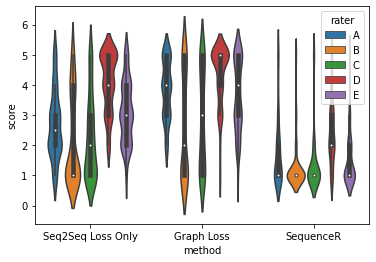

In [161]:
label_melt = all_hand_labels.melt(id_vars=["method","rater"], 
                     value_vars=["syntax","reasonableness","acceptability"],
                     var_name = "metric",
                     value_name = "score")
sns.violinplot(data=label_melt, x = "method",hue="rater", y="score")

In [137]:
label_melt

,method,rater,metric,score
0,Seq2Seq Loss Only,A,syntax,5
1,Graph Loss,A,syntax,5
2,SequenceR,A,syntax,2
3,Graph Loss,A,syntax,5
4,SequenceR,A,syntax,2
...,...,...,...,...
1795,Graph Loss,D,acceptability,2
1796,Seq2Seq Loss Only,D,acceptability,2
1797,Graph Loss,D,acceptability,2
1798,SequenceR,D,acceptability,1


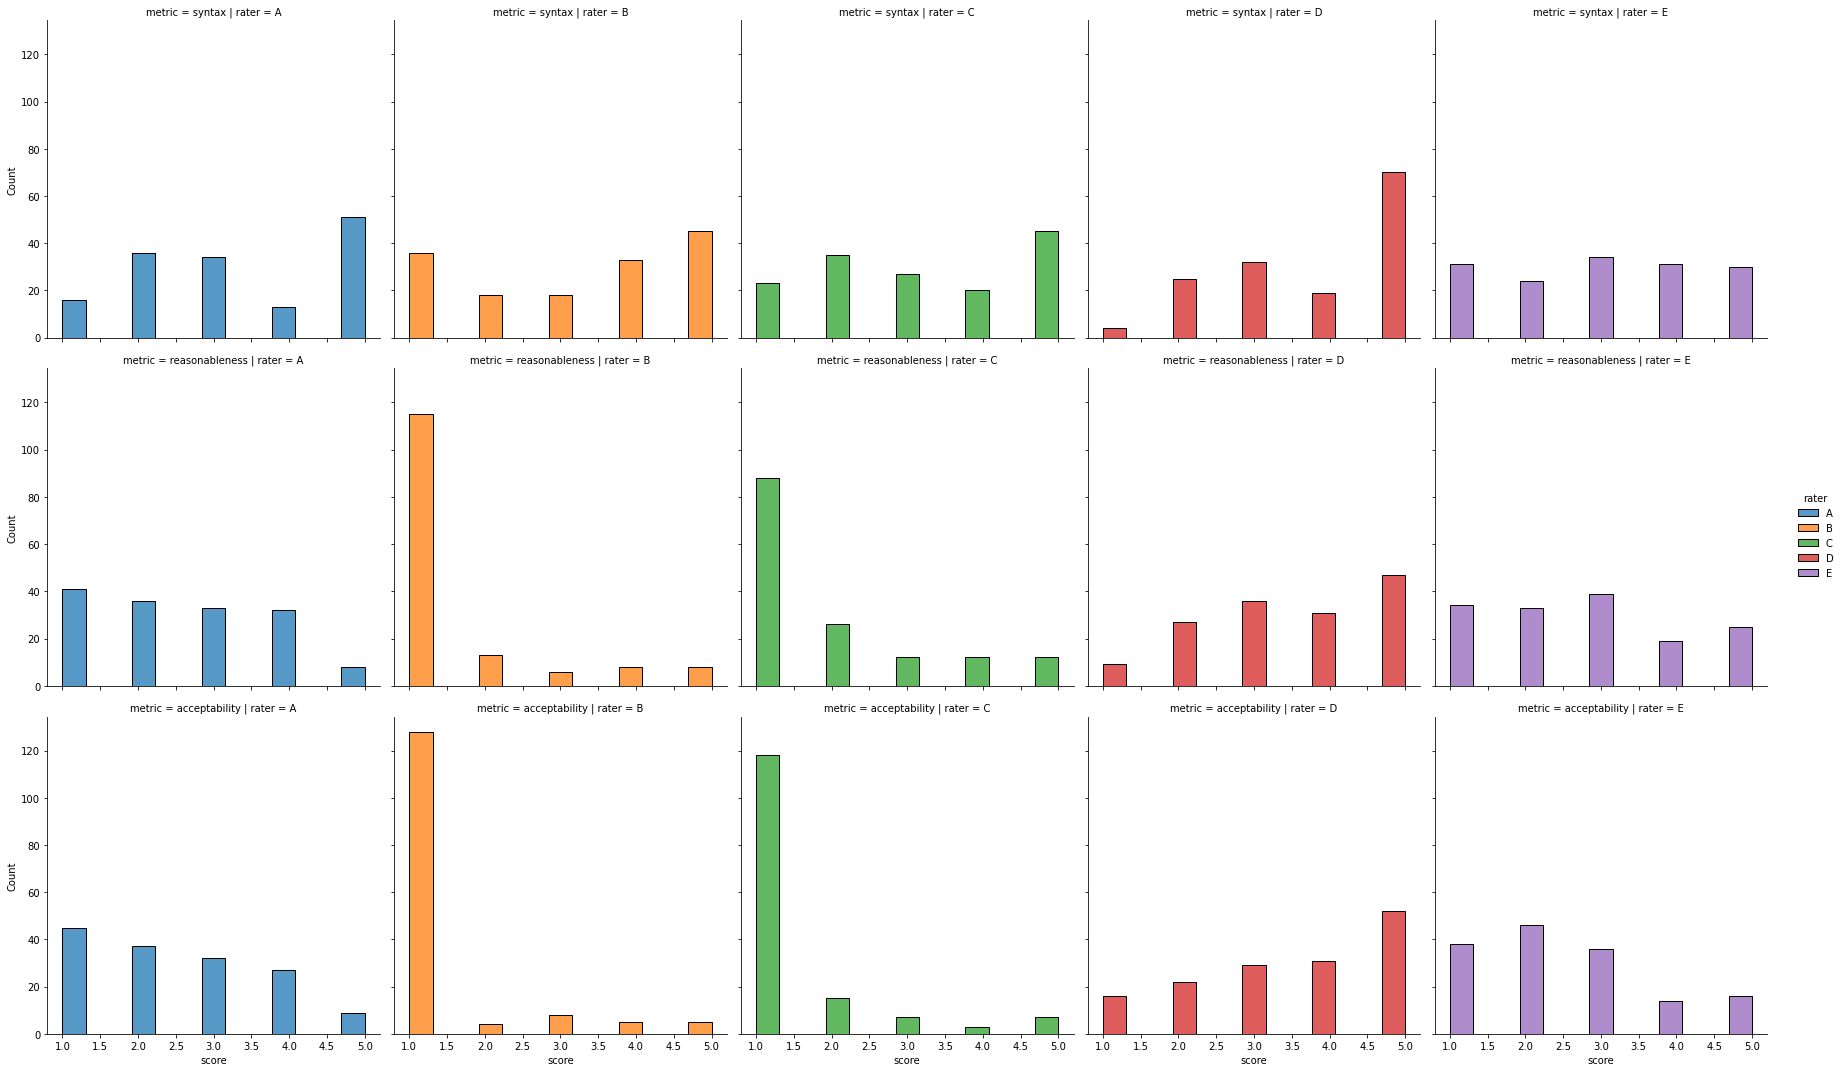

In [162]:
sns.displot( data = label_melt, x="score", col="rater", row="metric", hue="rater")

In [112]:
all_hand_labels

,input,prediction,syntax,reasonableness,acceptability,rater,method,example,input_id
0,GPU_COUNT = 1\nIMAGES_PER_GPU = 4 # a memory e...,_COUNT = 1\nIMAGES_PER_GPU = 5 # a memory erro...,5,3,3,0,Seq2Seq Loss Only,0,0
1,GPU_COUNT = 1\nIMAGES_PER_GPU = 4 # a memory e...,GPU_COUNT = 1\nIMAGES_PER_GPU = 5 # a memory e...,5,4,4,0,Graph Loss,1,0
2,GPU_COUNT = 1\nIMAGES_PER_GPU = 4 # a memory e...,BATCH_SIZE = 1 TRAIN_BATCH_SIZE = 4 # a the no...,2,1,1,0,SequenceR,2,0
3,"train_df2 = train_df\ntrain_df2[""label""] = tra...","train_df2 = train_df\ntrain_df1[""label""] = tra...",5,4,4,0,Graph Loss,3,1
4,"train_df2 = train_df\ntrain_df2[""label""] = tra...","<unk> = train_df <unk>[""target""] = train_df[""t...",2,2,1,0,SequenceR,4,1
...,...,...,...,...,...,...,...,...,...
145,question_1 = Word_Extractor.transform(train.ix...,question_1 = Word_Extractor.transform(train.ix...,5,2,2,3,Graph Loss,145,48
146,question_1 = Word_Extractor.transform(train.ix...,"_1 = Word_equation.transform(train.ix[:,'quest...",3,3,2,3,Seq2Seq Loss Only,146,48
147,"train_clicked = pd.merge(train, events, how='l...","train_clicked = pd.merge(train, events, how='l...",4,2,2,3,Graph Loss,147,49
148,"train_clicked = pd.merge(train, events, how='l...","<unk> = pd.merge(train, train_vectors, how='le...",2,1,1,3,SequenceR,148,49


In [163]:
simpledorff.calculate_krippendorffs_alpha_for_df(all_hand_labels,experiment_col='example',
                                                 annotator_col='rater',
                                                 class_col="syntax")

0.2668644056208609

In [140]:
simpledorff.calculate_krippendorffs_alpha_for_df(all_hand_labels,experiment_col='example',
                                                 annotator_col='rater',
                                                 class_col="reasonableness")

0.07048105321119758

In [141]:
simpledorff.calculate_krippendorffs_alpha_for_df(all_hand_labels,experiment_col='example',
                                                 annotator_col='rater',
                                                 class_col="acceptability")

0.054752691954429444

Cronbach Alpha:

In [142]:
pg.cronbach_alpha(all_hand_labels, items="example",subject="rater",scores="syntax")

(0.9593312504223873, array([0.872, 0.997]))

In [143]:
pg.cronbach_alpha(all_hand_labels, items="example",subject="rater",scores="reasonableness")

(0.992506505127569, array([0.976, 0.999]))

In [144]:
pg.cronbach_alpha(all_hand_labels, items="example",subject="rater",scores="acceptability")

(0.9931345810213488, array([0.978, 1.   ]))

Spearman $\rho$:

In [145]:
all_hand_labels.pivot(index="example", values=["syntax"],columns="rater")

syntax         
rater        A  B  C  D
example                
0            5  4  5  4
1            5  5  5  5
2            2  3  4  4
3            5  5  5  5
4            2  1  2  1
...        ... .. .. ..
145          5  5  5  5
146          3  4  4  3
147          3  5  5  4
148          3  2  3  2
149          2  4  5  5

[150 rows x 4 columns]

In [131]:
all_hand_labels.pivot(index="example", values=["syntax"],columns="rater").columns

MultiIndex([('syntax', 0),
            ('syntax', 1),
            ('syntax', 2),
            ('syntax', 3)],
           names=[None, 'rater'])

In [164]:
pg.pairwise_corr(all_hand_labels.pivot(index="example", values=["syntax"],columns="rater"),
                 method="spearman")["r"].mean()

0.6644187176883802

In [165]:
pg.pairwise_corr(all_hand_labels.pivot(index="example", values=["reasonableness"],columns="rater"),
                 method="spearman")["r"].mean()

0.5343205787299355

In [166]:
pg.pairwise_corr(all_hand_labels.pivot(index="example", values=["acceptability"],columns="rater"),
                 method="spearman")["r"].mean()

0.4623053199521072

## Significance Testing

In [167]:
pg.pairwise_ttests(dv='syntax', within='method', data=all_hand_labels, parametric=False).round(3)


,Contrast,A,B,Paired,Parametric,W-val,Tail,p-unc,hedges
0,method,Seq2Seq Loss Only,Graph Loss,True,False,1674.0,two-sided,0.0,-0.750
1,method,Seq2Seq Loss Only,SequenceR,True,False,2971.0,two-sided,0.0,1.065
2,method,Graph Loss,SequenceR,True,False,1074.0,two-sided,0.0,1.830


In [168]:
pg.pairwise_ttests(dv="reasonableness", within='method', subject="example",data=all_hand_labels,
                  parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,W-val,Tail,p-unc,hedges
0,method,Seq2Seq Loss Only,Graph Loss,True,False,2660.5,two-sided,0.0,-0.400
1,method,Seq2Seq Loss Only,SequenceR,True,False,361.5,two-sided,0.0,1.035
2,method,Graph Loss,SequenceR,True,False,78.0,two-sided,0.0,1.478


In [169]:
pg.pairwise_ttests(dv="acceptability", within='method',
                    subject='example', data=all_hand_labels,
                  parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,W-val,Tail,p-unc,hedges
0,method,Seq2Seq Loss Only,Graph Loss,True,False,2211.0,two-sided,0.0,-0.352
1,method,Seq2Seq Loss Only,SequenceR,True,False,422.0,two-sided,0.0,0.882
2,method,Graph Loss,SequenceR,True,False,64.5,two-sided,0.0,1.230
